# Modelo de Regressão Linear Simples

1 - Preparação do Ambiente e Carregamento dos Dados: Importação de bibliotecas e carregamento inicial do dataset.

2 - **Análise Descritiva dos Dados:** Explorar as características básicas das variáveis.

3 - **Análise de Correlação:** Quantificar a força e direção da relação entre as variáveis.

4 - **Modelagem de Regressão Linear Simples:** Construir e ajustar os modelos.

5 - **Análise e Diagnóstico de Resíduos:** Avaliar as suposições do modelo para garantir a validade das inferências.

6 - **Análise e Interpretação dos Modelos:** Extrair insights dos resultados estatísticos.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np # Para operações numéricas
import pandas as pd # Para manipulação de dados em DataFrame
import seaborn as sns # Para visualização de dados estatísticos
import matplotlib.pyplot as plt # Para criação de gráficos
import statsmodels.api as sm # Para modelos estatísticos (como regressão)
from statsmodels.stats.diagnostic import het_breuschpagan # Teste de Breusch-Pagan para homocedasticidade
from statsmodels.stats.outliers_influence import variance_inflation_factor # Para VIF (não usado no modelo simples, mas útil para multi)
from statsmodels.stats.diagnostic import lilliefors # Teste de Lilliefors para normalidade (alternativa a Shapiro-Wilk)
import scipy.stats as stats # Para funções estatísticas, incluindo testes de normalidade

### 1 – Análise descritiva

Carregando a base de dados

In [2]:
dados = pd.read_csv('../data/propaganda.csv')

Analise descritiva das medidas de tendencia central via tabela

In [3]:
dados.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Verificação do tamanho da base de dados

In [4]:
dados.shape

(200, 4)

Visualização das 5 primeiras linhas 

In [5]:
dados.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Verificação do tipo das variáveis

In [6]:
dados.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

Verificação de valores ausentes e nulos

In [7]:
dados.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

A base de dados não possui dados faltantes ou nulos e todos os dados são do mesmo tipo.

Análise gráfica - Pairplot para visualizar a distribuição e relação entre as variáveis
A função pairplot cria uma grade de gráficos onde:
 - Diagonal: Histograma ou KDE (Kernel Density Estimate) da distribuição de cada variável.
 - Fora da diagonal: Gráfico de dispersão entre cada par de variáveis.

<Figure size 1000x1000 with 0 Axes>

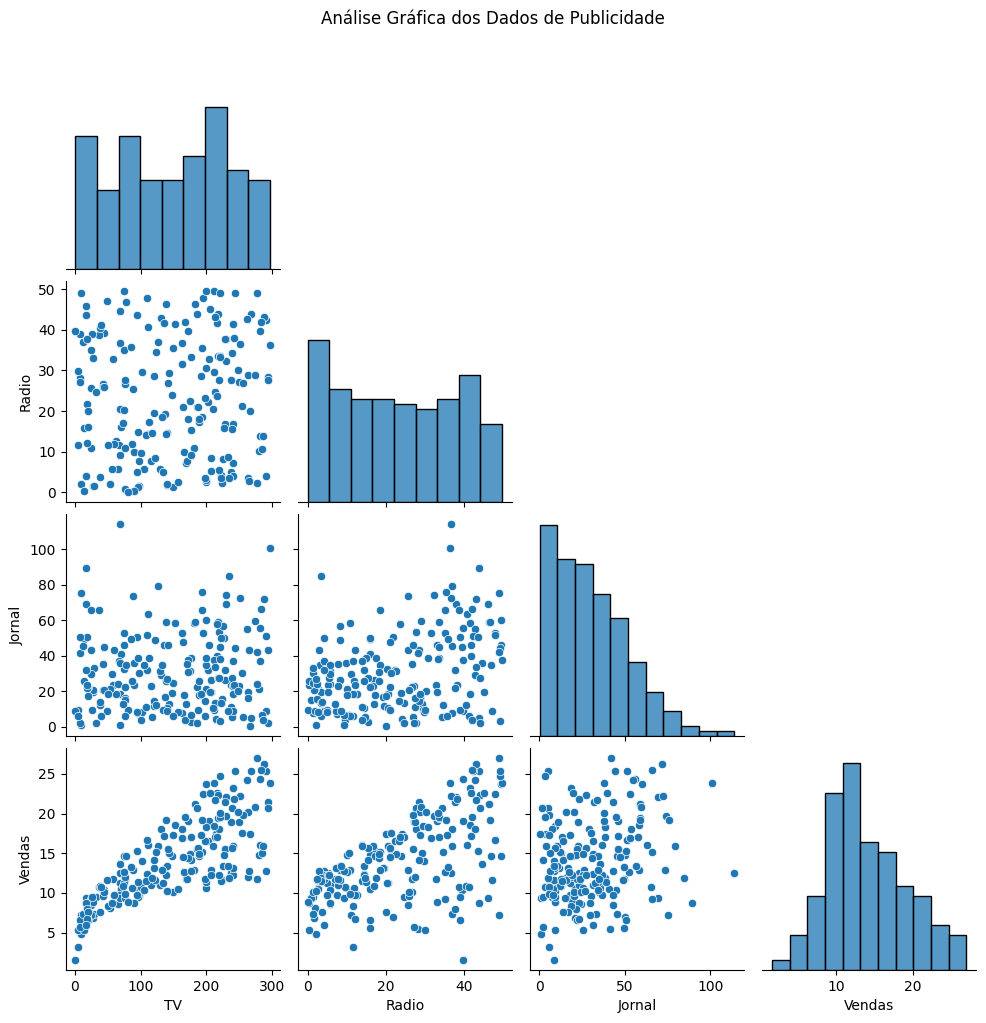

In [8]:
# Análise gráfica - Pairplot
plt.figure(figsize=(10, 10)) # Ajusta o tamanho da figura para melhor visualização
sns.pairplot(dados, corner=True) # corner=True corta metade do gráfico, já que é simétrico
plt.suptitle("Análise Gráfica dos Dados de Publicidade", y=1.02) # Título centralizado acima dos subplots
plt.show()

Analise grafica para verificar a disposição dos dados e relação entre as variáveis

### 2 – Calculo de correlação


A análise de correlação quantifica a força e a direção da relação linear entre duas variáveis. O coeficiente de correlação de Pearson, que varia de -1 a 1, é comumente usado:

    1: Correlação positiva perfeita
    -1: Correlação negativa perfeita
    0: Nenhuma correlação linear

Uma matriz de correlação e um heatmap visualizam essas relações para todos os pares de variáveis no dataset, facilitando a identificação de preditores potenciais para nossa variável dependente (Vendas).

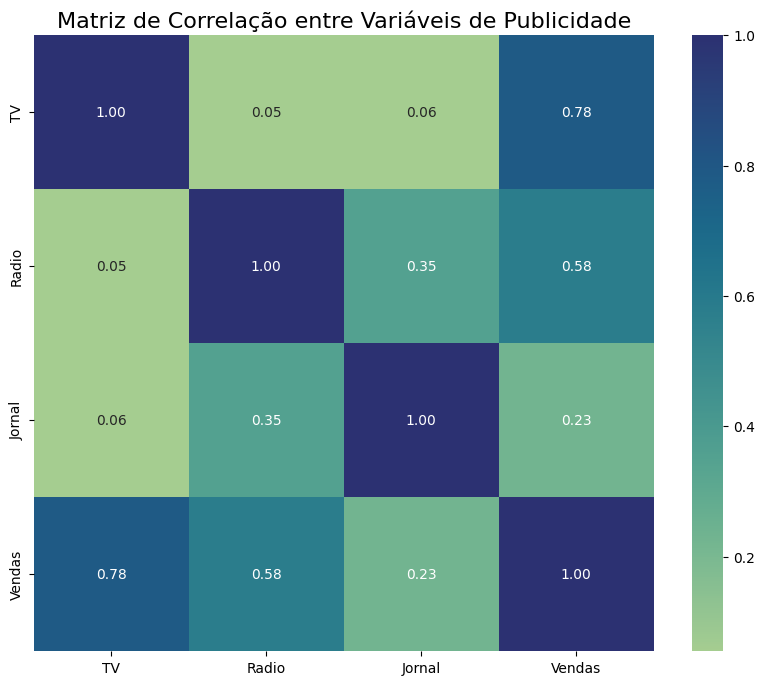

In [9]:
# Calcula a matriz de correlação
correlation_matrix = dados.corr()

# Cria um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap="crest", fmt=".2f") # annot=True mostra os valores, fmt formata
plt.title("Matriz de Correlação entre Variáveis de Publicidade", fontsize=16) # Título do gráfico
plt.show()


Podemos ver claramente que a correlacão de Vendas com propagandas em TV é maior que na Radio que é maior que no Jornal

### 3 – Faça o modelo de regressão

A Regressão Linear Simples busca modelar a relação entre uma variável dependente (resposta) e uma única variável independente (preditora) através de uma equação linear: Y=β0+β1X+ϵ, onde:

    Y: Variável dependente (Vendas).
    X: Variável independente (Investimento em TV, Rádio ou Jornal).
    β0:Coeficiente de intercepto (valor de Y quando X é zero).
    β1:Coeficiente angular (mudança em Y para cada unidade de mudança em X).
    ϵ: Termo de erro aleatório, representando a variabilidade não explicada pelo modelo.

Utilizaremos o método dos Mínimos Quadrados Ordinários (OLS) para estimar os coeficientes β0 e β1, que minimizam a soma dos quadrados dos resíduos.

In [10]:
def fit_simple_linear_model(X_data, y_data, model_name):
    """
    Constrói e ajusta um modelo de regressão linear simples.

    Args:
        X_data (pd.Series): Série pandas contendo a variável independente.
        y_data (pd.Series): Série pandas contendo a variável dependente.
        model_name (str): Nome do modelo (e.g., "TV", "Radio", "Jornal").

    Returns:
        statsmodels.regression.linear_model.RegressionResultsWrapper: Objeto do modelo ajustado.
    """
    # Adicionando uma constante ao preditor para o cálculo do intercepto (beta_0)
    X_with_const = sm.add_constant(X_data)

    # Ajustando o modelo de regressão linear usando OLS (Ordinary Least Squares)
    model = sm.OLS(y_data, X_with_const).fit()

    print(f"\n--- Sumário do Modelo: Vendas vs. {model_name} ---")
    print(model.summary())
    return model

# Definindo a variável dependente (Vendas)
y = dados['Vendas']

# Definindo as variáveis independentes para cada modelo
X_tv = dados['TV']
X_radio = dados['Radio']
X_jornal = dados['Jornal']

# Ajustando e exibindo o sumário para cada modelo
modelo_tv = fit_simple_linear_model(X_tv, y, 'TV')
modelo_radio = fit_simple_linear_model(X_radio, y, 'Rádio')
modelo_jornal = fit_simple_linear_model(X_jornal, y, 'Jornal')


--- Sumário do Modelo: Vendas vs. TV ---
                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        19:39:25   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

### 4 – Análise e Diagnóstico de Resíduos


A análise de resíduos é crucial para verificar se as suposições do modelo de regressão linear foram atendidas. As principais suposições sobre os resíduos (ϵ) são:

    - Normalidade: Os resíduos devem seguir uma distribuição normal. Isso pode ser verificado com testes estatísticos (Shapiro-Wilk) e gráficos (Q-Q Plot).
    - Homocedasticidade: A variância dos resíduos deve ser constante em todos os níveis da variável preditora. Isso pode ser verificado graficamente (Gráfico de Resíduos vs. Valores Ajustados) e com testes estatísticos (Breusch-Pagan). A heterocedasticidade (variância não constante) pode levar a estimativas de coeficientes ineficientes e intervalos de confiança incorretos.
    - Independência: Os resíduos devem ser independentes uns dos outros. Isso é geralmente uma preocupação em dados de séries temporais. (Não abordaremos em profundidade aqui, mas é importante mencionar).
    - Ausência de Outliers/Observações Influentes: Observações com resíduos padronizados muito grandes (geralmente fora do intervalo [-3, 3]) ou que exercem grande influência no modelo podem distorcer os resultados.


--- Análise Gráfica de Homocedasticidade ---


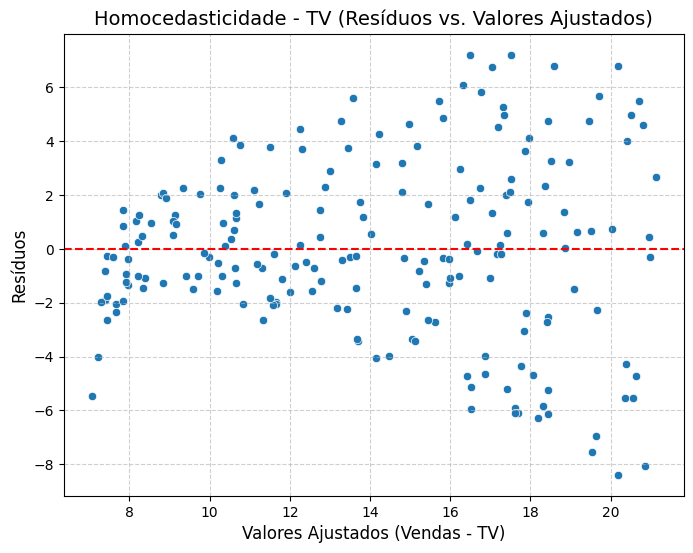

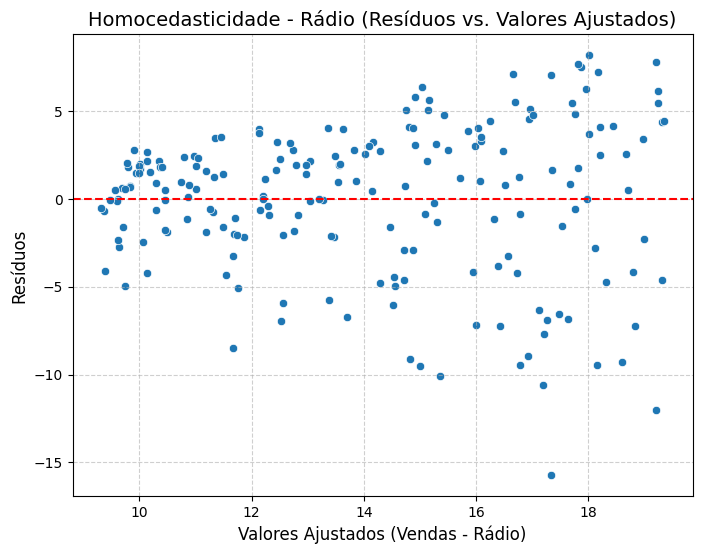

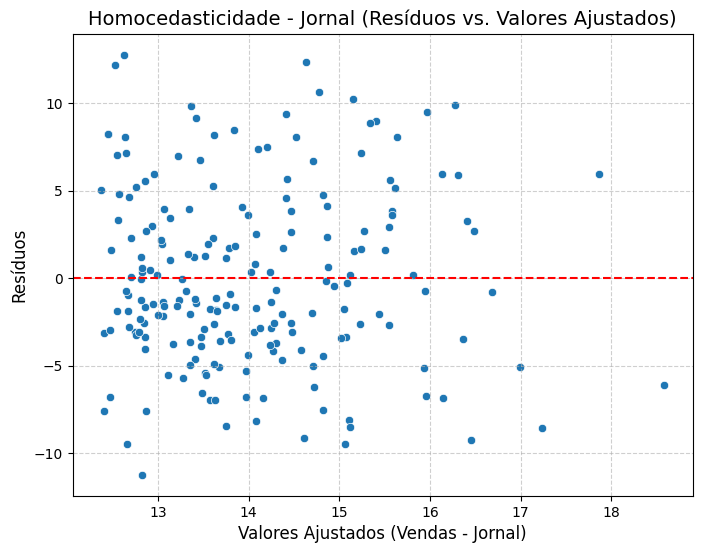

In [11]:
# Separar os resíduos para cada modelo
residuos_tv = modelo_tv.resid
residuos_radio = modelo_radio.resid
residuos_jornal = modelo_jornal.resid

# Separar os valores ajustados (predicted values) para cada modelo
valores_ajustados_tv = modelo_tv.fittedvalues
valores_ajustados_radio = modelo_radio.fittedvalues
valores_ajustados_jornal = modelo_jornal.fittedvalues

# Lista de modelos e seus dados correspondentes para iteração
modelos_para_analise = [
    ('TV', modelo_tv, X_tv),
    ('Rádio', modelo_radio, X_radio),
    ('Jornal', modelo_jornal, X_jornal)
]

# --- Função para Gráficos de Homocedasticidade (Resíduos vs. Valores Ajustados) ---
def plot_homocedasticity(model_name, fitted_values, residuals):
    """
    Gera um gráfico de dispersão dos resíduos vs. valores ajustados
    para verificar a suposição de homocedasticidade.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=fitted_values, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Homocedasticidade - {model_name} (Resíduos vs. Valores Ajustados)', fontsize=14)
    plt.xlabel(f'Valores Ajustados (Vendas - {model_name})', fontsize=12)
    plt.ylabel('Resíduos', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n--- Análise Gráfica de Homocedasticidade ---")
plot_homocedasticity('TV', valores_ajustados_tv, residuos_tv)
plot_homocedasticity('Rádio', valores_ajustados_radio, residuos_radio)
plot_homocedasticity('Jornal', valores_ajustados_jornal, residuos_jornal)

Interpretação da Homocedasticidade Gráfica:
No gráfico 'TV', observa-se um padrão em forma de cone, onde a dispersão dos resíduos aumenta com os valores ajustados. Isso pode indicar heterocedasticidade.
No gráfico 'Rádio', o padrão também sugere um aumento na dispersão, apontando para heterocedasticidade.
No gráfico 'Jornal', os pontos estão mais aleatoriamente espalhados em torno da linha zero, com uma faixa de dispersão mais constante, o que pode indicar homocedasticidade.

#### Teste de Homocedasticidade com Breusch-Pagan

In [12]:
# --- Teste de Homocedasticidade com Breusch-Pagan ---
def run_breuschpagan_test(model_name, model_obj, X_data):
    """
    Executa o teste de Breusch-Pagan para verificar homocedasticidade.
    H0: Homocedasticidade (variância dos resíduos é constante)
    H1: Heterocedasticidade (variância dos resíduos não é constante)
    """
    # Adicionar uma constante à variável independente para o teste (se ainda não tiver)
    X_test = sm.add_constant(X_data) if X_data.shape[1] == 1 else X_data
    estatistica, p_valor, f_estatistica, f_p_valor = het_breuschpagan(model_obj.resid, X_test)
    print(f"\n--- Teste de Breusch-Pagan para {model_name} ---")
    print(f"Estatística de Teste: {estatistica:.4f}")
    print(f"P-valor: {p_valor:.4f}")
    print(f"F-Estatística: {f_estatistica:.4f}")
    print(f"F-P-valor: {f_p_valor:.4f}")

    if p_valor < 0.05:
        print(f"Conclusão: Rejeitamos H0. Há evidências de heterocedasticidade no modelo {model_name}.")
    else:
        print(f"Conclusão: Não rejeitamos H0. Há evidências de homocedasticidade no modelo {model_name}.")

print("\n--- Testes de Homocedasticidade (Breusch-Pagan) ---")
for name, model, X_original in modelos_para_analise:
    run_breuschpagan_test(name, model, sm.add_constant(X_original)) # Passando X_original com constante




--- Testes de Homocedasticidade (Breusch-Pagan) ---

--- Teste de Breusch-Pagan para TV ---
Estatística de Teste: 48.0380
P-valor: 0.0000
F-Estatística: 62.5914
F-P-valor: 0.0000
Conclusão: Rejeitamos H0. Há evidências de heterocedasticidade no modelo TV.

--- Teste de Breusch-Pagan para Rádio ---
Estatística de Teste: 36.6458
P-valor: 0.0000
F-Estatística: 44.4180
F-P-valor: 0.0000
Conclusão: Rejeitamos H0. Há evidências de heterocedasticidade no modelo Rádio.

--- Teste de Breusch-Pagan para Jornal ---
Estatística de Teste: 2.4717
P-valor: 0.1159
F-Estatística: 2.4776
F-P-valor: 0.1171
Conclusão: Não rejeitamos H0. Há evidências de homocedasticidade no modelo Jornal.


#### Breusch-Pagan:
Se o p-valor do teste menor que 0.05, indica a presença de heterocedasticidade e pode ser necessário ajustar o modelo ou usar métodos robustos para estimativa de variância.
modelo_tv     p-valor < 0.05
modelo_radio  p-valor < 0.05
modelo_jornal p-valor > 0.05

#### Teste de Normalidade dos Resíduos com Shapiro-Wilk

In [13]:
def run_shapiro_wilk_test(model_name, residuals):
    """
    Executa o teste de Shapiro-Wilk para verificar a normalidade dos resíduos.
    H0: Os resíduos seguem uma distribuição normal.
    H1: Os resíduos não seguem uma distribuição normal.
    """
    estatistica_shapiro, p_shapiro = stats.shapiro(residuals)
    print(f"\n--- Teste de Shapiro-Wilk para {model_name} ---")
    print(f"Estatística de Teste: {estatistica_shapiro:.4f}")
    print(f"P-valor: {p_shapiro:.4f}")

    if p_shapiro < 0.05:
        print(f"Conclusão: Rejeitamos H0. Os resíduos do modelo {model_name} não seguem uma distribuição normal.")
    else:
        print(f"Conclusão: Não rejeitamos H0. Os resíduos do modelo {model_name} seguem uma distribuição normal.")

print("\n--- Testes de Normalidade dos Resíduos (Shapiro-Wilk) ---")
run_shapiro_wilk_test('TV', residuos_tv)
run_shapiro_wilk_test('Rádio', residuos_radio)
run_shapiro_wilk_test('Jornal', residuos_jornal)


--- Testes de Normalidade dos Resíduos (Shapiro-Wilk) ---

--- Teste de Shapiro-Wilk para TV ---
Estatística de Teste: 0.9905
P-valor: 0.2133
Conclusão: Não rejeitamos H0. Os resíduos do modelo TV seguem uma distribuição normal.

--- Teste de Shapiro-Wilk para Rádio ---
Estatística de Teste: 0.9607
P-valor: 0.0000
Conclusão: Rejeitamos H0. Os resíduos do modelo Rádio não seguem uma distribuição normal.

--- Teste de Shapiro-Wilk para Jornal ---
Estatística de Teste: 0.9820
P-valor: 0.0114
Conclusão: Rejeitamos H0. Os resíduos do modelo Jornal não seguem uma distribuição normal.


#### Shapiro:
Se p-valor do shapiro é superior a 0.05,isso indica que os resíduos seguem aproximadamente uma distribuição normal.

- modelo_tv     p-valor > 0.05
- modelo_radio  p-valor > 0.05
- modelo_jornal p-valor < 0.05

#### Análise de normalidade QQ-plot


--- Análise Gráfica de Normalidade (Q-Q Plot) ---


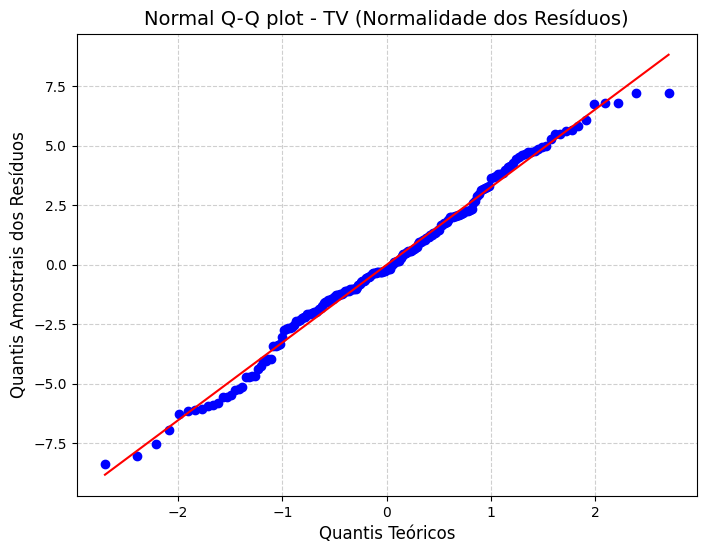

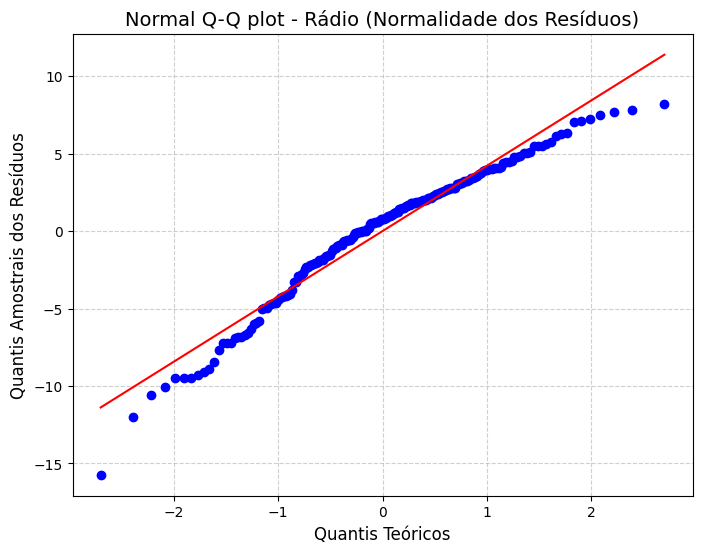

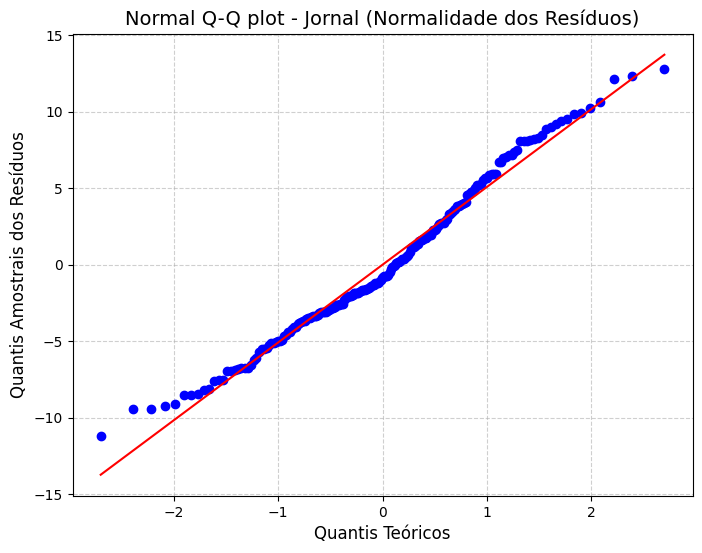


Interpretação dos Q-Q Plots:
Aparentemente, os Q-Q plots para todos os modelos mostram que os pontos se aproximam da reta, sugerindo que os resíduos parecem ser aproximadamente normais, apesar dos resultados dos testes de Shapiro-Wilk para 'Rádio' e 'Jornal'. Pequenos desvios nas caudas são comuns em amostras reais.


In [14]:
def plot_qq(model_name, residuals):
    """
    Gera um QQ-plot para verificar a normalidade dos resíduos.
    """
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Normal Q-Q plot - {model_name} (Normalidade dos Resíduos)", fontsize=14)
    plt.xlabel('Quantis Teóricos', fontsize=12)
    plt.ylabel('Quantis Amostrais dos Resíduos', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

print("\n--- Análise Gráfica de Normalidade (Q-Q Plot) ---")
plot_qq('TV', residuos_tv)
plot_qq('Rádio', residuos_radio)
plot_qq('Jornal', residuos_jornal)

print("\nInterpretação dos Q-Q Plots:")
print("Aparentemente, os Q-Q plots para todos os modelos mostram que os pontos se aproximam da reta, sugerindo que os resíduos parecem ser aproximadamente normais, apesar dos resultados dos testes de Shapiro-Wilk para 'Rádio' e 'Jornal'. Pequenos desvios nas caudas são comuns em amostras reais.")


Aparentemente todos se aproximam da reta e parecem ser normais.


--- Análise de Outliers (Resíduos Padronizados) ---


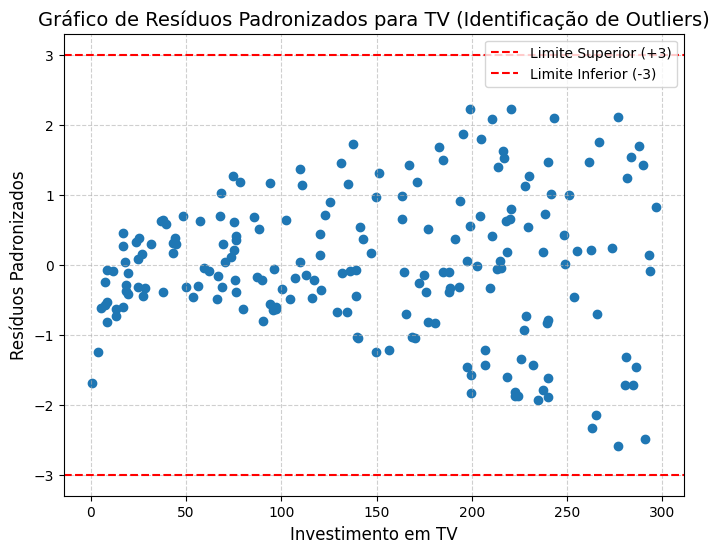

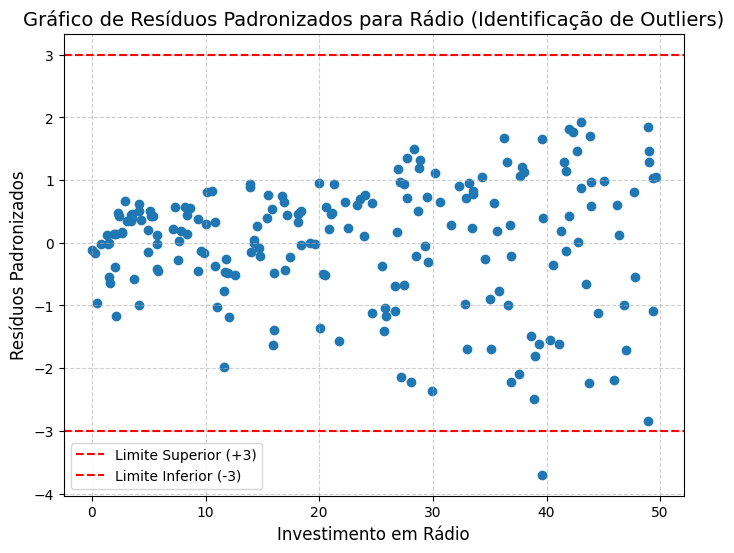

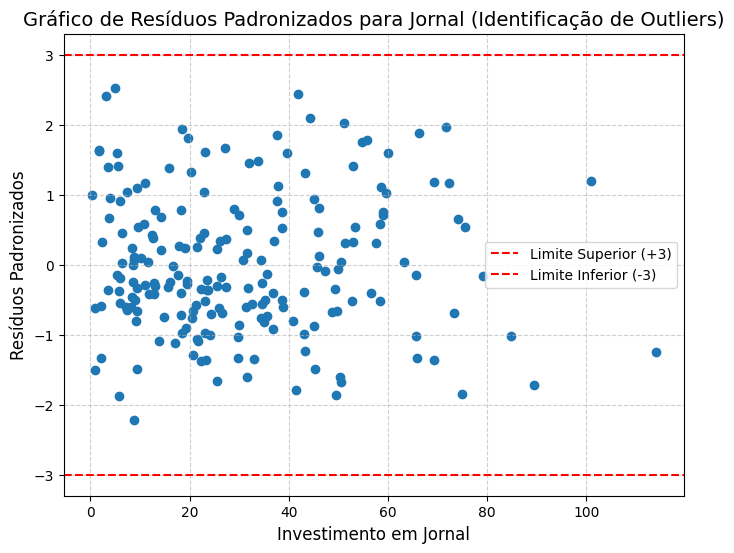

In [15]:
def plot_standardized_residuals(model_name, model_obj, X_data):
    """
    Gera um gráfico de resíduos padronizados para identificar outliers.
    """
    residuos_padronizados = model_obj.get_influence().resid_studentized_internal

    plt.figure(figsize=(8, 6))
    plt.scatter(X_data, residuos_padronizados)
    plt.axhline(y=3, color='r', linestyle='--', label='Limite Superior (+3)')
    plt.axhline(y=-3, color='r', linestyle='--', label='Limite Inferior (-3)')
    plt.title(f'Gráfico de Resíduos Padronizados para {model_name} (Identificação de Outliers)', fontsize=14)
    plt.xlabel(f'Investimento em {model_name}', fontsize=12)
    plt.ylabel('Resíduos Padronizados', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\n--- Análise de Outliers (Resíduos Padronizados) ---")
for name, model, X_original in modelos_para_analise:
    plot_standardized_residuals(name, model, X_original)


**Interpretação dos Resíduos Padronizados:**

Em nenhum dos gráficos de resíduos padronizados há pontos que ultrapassem significativamente as linhas de limite (+3 e -3). Isso sugere que não existem outliers extremos ou observações altamente influentes que distorçam indevidamente as estimativas do modelo.

| Modelo  | Homocedasticidade (Breusch-Pagan) | Normalidade (Shapiro-Wilk) | Normalidade (Q-Q Plot) | Outliers |
|---------|-----------------------------------|----------------------------|------------------------|----------|
| TV      | ❌ (Heterocedasticidade)        | ✅ (Normal)                  | ✅ (Aprox. Normal)    | ✅ (Ausentes) |
| Rádio   | ❌ (Heterocedasticidade)        | ❌ (Não Normal)              | ❌ (Não Normal)       | ✅ (Ausentes) |
| Jornal  | ✅ (Homocedasticidade)         | ❌ (Não Normal)              | ❌ (Não Normal)        | ✅ (Ausentes) |

### 5 – Análise do Modelo

A tabela de sumário do statsmodels fornece informações cruciais:

    - R-squared (R²): Indica a proporção da variância na variável dependente que é explicada pelas variáveis independentes. Um R² de 0.612 significa que 61.2% da variabilidade nas Vendas é explicada pelo Investimento em TV.
    - Adj. R-squared (R² Ajustado): Uma versão ajustada do R² que penaliza a adição de preditores desnecessários. É mais útil em regressão múltipla, mas também é bom observar em modelos simples.
    - F-statistic e Prob (F-statistic): Avaliam a significância global do modelo. Um p-valor (Prob) muito baixo (< 0.05) indica que o modelo como um todo é estatisticamente significativo, ou seja, pelo menos um dos preditores é útil para explicar a variável dependente.
    - Coeficientes (coef):
        - const (β0): O intercepto. Representa o valor médio da variável dependente quando a variável independente é zero.
        - Variável Independente (β1): O coeficiente angular. Representa a mudança média na variável dependente para cada unidade de aumento na variável independente, mantendo outras variáveis constantes.
        - std err: Erro padrão do coeficiente, usado para construir intervalos de confiança.
        - t e P>|t|: O valor t e seu p-valor correspondente para o teste de significância individual de cada coeficiente. Um p-valor baixo (< 0.05) indica que o coeficiente é estatisticamente diferente de zero.
        - [0.025 0.975]: Intervalo de confiança de 95% para o coeficiente.

In [16]:
# Ajustando e exibindo o sumário para cada modelo
modelo_tv = fit_simple_linear_model(X_tv, y, 'TV')
modelo_radio = fit_simple_linear_model(X_radio, y, 'Rádio')
modelo_jornal = fit_simple_linear_model(X_jornal, y, 'Jornal')


--- Sumário do Modelo: Vendas vs. TV ---
                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        19:39:27   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

| Modelo  | Teste T (Significância dos Coeficientes) | Teste F (Significância Global) | R² Ajustado |
|---------|-----------------------------------------|--------------------------------|-------------|
| TV      | ✅                                        | ✅                              | 0.612       |
| Rádio   | ✅                                        | ✅                              | 0.332       |
| Jornal  | ✅                                        | ✅                              | 0.052       |

#### Teste T:
O Teste T avalia a significância estatística de cada coeficiente no modelo. Um p-valor baixo (< 0.05) indica que o coeficiente é significativo. Nos resultados fornecidos, todos os modelos mostraram coeficientes significativos (p-valor < 0.05 para os coeficientes de TV, Rádio e Jornal).

#### Teste F:
O Teste F avalia a significância global do modelo. Um p-valor baixo (< 0.05) sugere que o modelo, como um todo, é significativo. Todos os modelos (TV, Rádio e Jornal) apresentaram p-valores baixos no Teste F, indicando que são estatisticamente significativos.

#### R² Ajustado:
O R² Ajustado reflete a porcentagem da variabilidade da variável dependente explicada pelo modelo, ajustada pelo número de preditores. Valores mais altos indicam um melhor ajuste. No caso, o modelo de TV tem um R² Ajustado de 0.610, indicando que cerca de 61% da variabilidade em Vendas é explicada pelo modelo. Os modelos de Rádio e Jornal têm R² Ajustado mais baixos, indicando um ajuste menos eficaz.

### Grafico dos medelos ajustados


--- Visualização dos Modelos de Regressão Ajustados ---


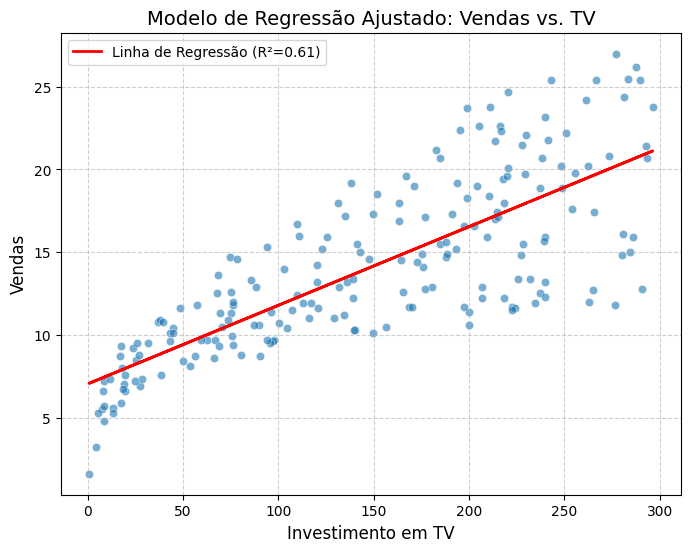

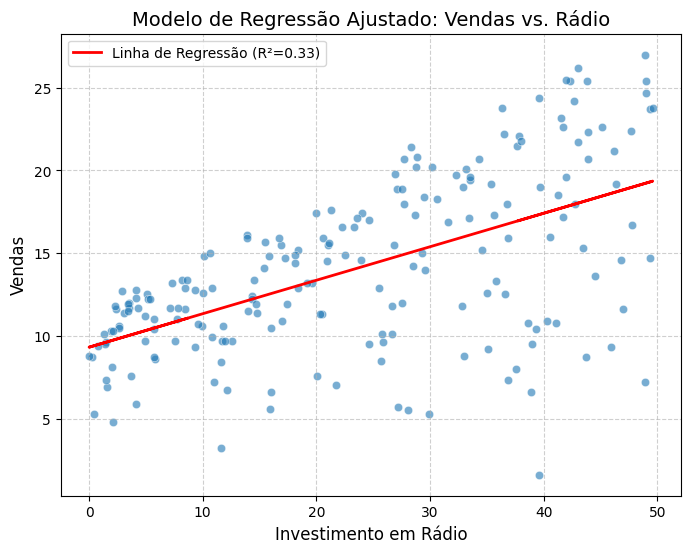

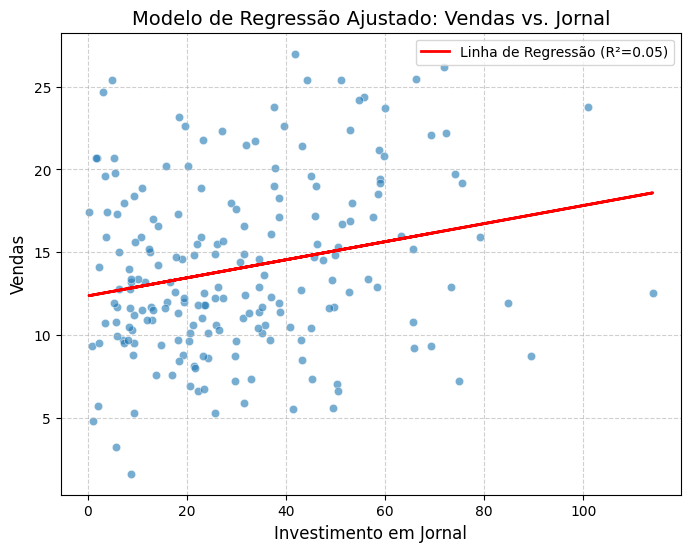

In [17]:
# --- Gráfico dos Modelos Ajustados ---
def plot_fitted_model(X_data, y_data, model_obj, model_name):
    """
    Gera um gráfico de dispersão com a linha de regressão ajustada.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_data, y=y_data, alpha=0.6)
    plt.plot(X_data, model_obj.fittedvalues, color='red', linewidth=2, label=f'Linha de Regressão (R²={model_obj.rsquared:.2f})')
    plt.title(f'Modelo de Regressão Ajustado: Vendas vs. {model_name}', fontsize=14)
    plt.xlabel(f'Investimento em {model_name}', fontsize=12)
    plt.ylabel('Vendas', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

print("\n--- Visualização dos Modelos de Regressão Ajustados ---")
plot_fitted_model(X_tv, y, modelo_tv, 'TV')
plot_fitted_model(X_radio, y, modelo_radio, 'Rádio')
plot_fitted_model(X_jornal, y, modelo_jornal, 'Jornal')

In [18]:
modelo_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        19:39:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusão Final da Análise

Com base na análise de correlação, no R² ajustado e nos testes de significância:

- O modelo de **TV** é o que melhor explica a variação nas vendas (R² de 0.62), indicando uma forte relação linear positiva. No entanto, apresentou heterocedasticidade.

- O modelo de **Jornal** é o que tem o menor poder explicativo (R² Ajustado de 0.052), embora seu coeficiente seja estatisticamente significativo (p-valor = 0.001) e os resíduos apresentem homocedasticidade, a baixa variância explicada o torna menos útil como preditor isolado.